In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset=pd.read_csv("Downloads/kc_house_data.csv")

In [7]:
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
dataset.shape

(21613, 21)

In [9]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
space=dataset['sqft_living']

In [11]:
price=dataset['price']

In [12]:
space

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

In [13]:
price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [16]:
x=np.array(space).reshape(-1,1)
y=np.array(price)

In [15]:
x

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [17]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [23]:
len(x_train)

14408

In [24]:
len(x_test)

7205

In [25]:
len(y_train)

14408

In [26]:
len(y_test)

7205

In [28]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [30]:
regressor.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred=regressor.predict(x_test)

In [32]:
y_pred

array([ 362496.90888926, 1249614.79894487,  365234.92706844, ...,
        482969.70877335,  288570.41805129,  255714.19990108])

In [33]:
y_test

array([ 297000., 1578000.,  562100., ...,  592500.,  284900.,  380000.])

In [34]:
x_test

array([[1430],
       [4670],
       [1440],
       ...,
       [1870],
       [1160],
       [1040]], dtype=int64)

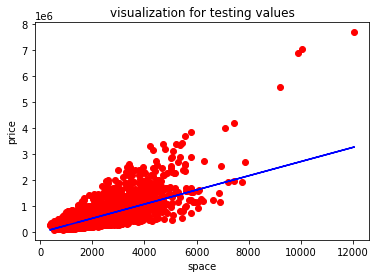

In [38]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,regressor.predict(x_test),color='blue')
plt.title("visualization for testing values")
plt.xlabel('space')
plt.ylabel('price')
plt.show()

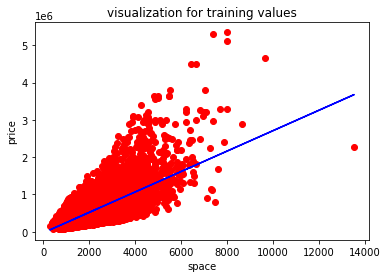

In [39]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('visualization for training values')
plt.xlabel('space')
plt.ylabel('price')
plt.show()

In [58]:
import statsmodels.api as sm
X_addC = sm.add_constant(x)
result = sm.OLS(y, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.4928532179037931 0.4928297508369245


#### 2nd time

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pypolt as plt

ModuleNotFoundError: No module named 'matplotlib.pypolt'